In [1]:
import numpy as np
import pandas as pd

In [2]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",header=0, index_col=0, na_values=-99.99)

In [3]:
me_m.index = pd.to_datetime(me_m.index, format = '%Y%m')

In [5]:
cols = ['Lo 20', 'Hi 20']
returns = me_m[cols]
returns

,Lo 20,Hi 20
1926-07-01,-0.57,3.33
1926-08-01,3.84,2.33
1926-09-01,-0.48,-0.09
1926-10-01,-3.29,-2.95
1926-11-01,-0.55,3.16
...,...,...
2018-08-01,3.09,2.49
2018-09-01,-2.04,0.19
2018-10-01,-10.52,-7.41
2018-11-01,-2.78,2.49


In [6]:
returns = returns/100

In [15]:
ret1 = returns['1999':'2015']

In [16]:
n_months = ret1.shape[0]
return_per_month = (ret1+1).prod()**(1/n_months) - 1
return_per_month

Lo 20    0.009069
Hi 20    0.005094
dtype: float64

In [17]:
annualized_return = (ret1+1).prod()**(12/n_months) - 1
annualized_return * 100

Lo 20    11.442634
Hi 20     6.286512
dtype: float64

In [18]:
annualized_vol = ret1.std()*np.sqrt(12)
annualized_vol * 100

Lo 20    22.889447
Hi 20    17.271332
dtype: float64

In [14]:
returns['1999':'2015']

,Lo 20,Hi 20
1999-01-01,0.1114,0.0153
1999-02-01,-0.0399,-0.0172
1999-03-01,-0.0308,0.0368
1999-04-01,0.0824,0.0679
1999-05-01,0.0435,-0.0048
...,...,...
2015-08-01,-0.0347,-0.0559
2015-09-01,-0.0610,-0.0333
2015-10-01,0.0385,0.0710
2015-11-01,0.0165,0.0015


<Axes: >

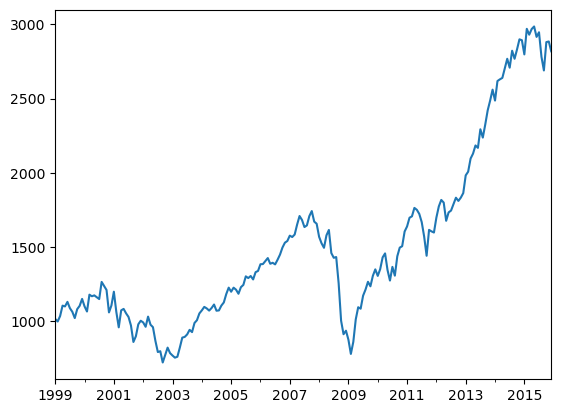

In [36]:
initial_investment = 1000
wealth_index = initial_investment*(1+ret1["Hi 20"]).cumprod()
wealth_index.plot()

<Axes: >

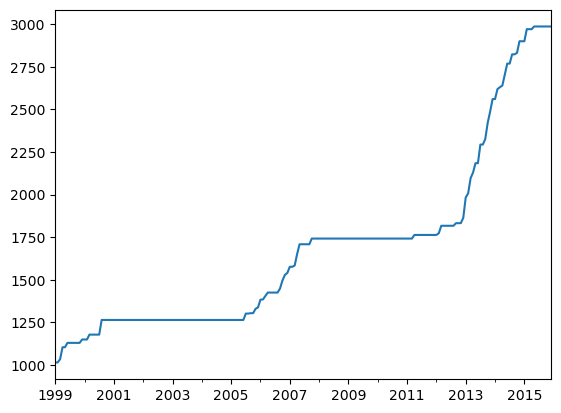

In [37]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<Axes: >

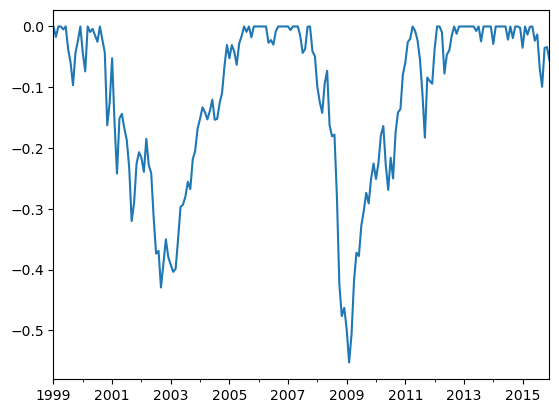

In [38]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [39]:
ser = pd.DataFrame({"Wealth": wealth_index, "Previous Peak": previous_peaks, "Drawdown": drawdown})
ser

,Wealth,Previous Peak,Drawdown
1999-01-01,1015.300000,1015.300000,0.000000
1999-02-01,997.836840,1015.300000,-0.017200
1999-03-01,1034.557236,1034.557236,0.000000
1999-04-01,1104.803672,1104.803672,0.000000
1999-05-01,1099.500614,1104.803672,-0.004800
...,...,...,...
2015-08-01,2782.642979,2986.379377,-0.068222
2015-09-01,2689.980968,2986.379377,-0.099250
2015-10-01,2880.969617,2986.379377,-0.035297
2015-11-01,2885.291071,2986.379377,-0.033850


In [42]:
ser.min() * 100

Wealth            72170.663807
Previous Peak    101530.000000
Drawdown            -55.273500
dtype: float64

In [41]:
test = ser['Drawdown'] == ser['Drawdown'].min()
ser[test]

,Wealth,Previous Peak,Drawdown
2009-02-01,779.227076,1742.204449,-0.552735


In [45]:
 hfi = pd.read_csv("data/edhec-hedgefundindices.csv",
                      header=0, index_col=0, parse_dates=True)
hfi = hfi/100
hfi.index = hfi.index.to_period('M')

C:\Users\DalFornoF\AppData\Local\Temp\ipykernel_1500\3506346953.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("data/edhec-hedgefundindices.csv",


In [53]:
r = hfi['2000':]

In [50]:
is_negative = r < 0
r[is_negative].std(ddof=0).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

In [54]:
r.kurtosis().sort_values()

CTA Global                -0.131541
Global Macro               0.694803
Short Selling              1.409938
Long/Short Equity          1.532452
Merger Arbitrage           1.581726
Event Driven               2.627274
Emerging Markets           3.034022
Distressed Securities      3.330953
Funds Of Funds             4.714240
Relative Value             9.975792
Equity Market Neutral     17.744379
Convertible Arbitrage     20.476005
Fixed Income Arbitrage    31.085539
dtype: float64